In [176]:
import pandas as pd

data = pd.read_excel("data/merged_data.xlsx")
data.shape, data.columns

((3134, 26),
 Index(['Unnamed: 0', 'State', 'AreaName', 'All_Poverty', 'M_Poverty',
        'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White',
        'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
        'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
        'fips_x', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
        'fips_y', 'Mortality_Rate', 'Avg_Ann_Deaths'],
       dtype='object'))

In [177]:
data.drop(["Unnamed: 0"], inplace=True, axis=1)

In [178]:
data.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [179]:
info = data.describe()
info.drop(["FIPS", "fips_x", "fips_y"], inplace=True, axis=1)
info

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without
count,3.134000e+03,3134.000000,3134.000000,3133.000000,3132.000000,1924.000000,1474.000000,1377.000000,2453.000000,3.134000e+03,3134.000000,3.134000e+03,3134.000000,3.134000e+03,3.134000e+03
mean,1.522966e+04,6828.800893,8400.855775,46819.837855,49490.181992,34750.214137,43309.998643,65412.969499,41118.231553,4.158963e+04,6930.955329,4.487357e+04,5968.701021,8.646320e+04,1.289966e+04
std,5.457122e+04,24719.078097,29865.855831,12246.380184,12461.508031,18198.952565,23707.973354,34012.807537,16232.191608,1.293894e+05,28686.089548,1.406455e+05,24657.276997,2.699985e+05,5.331494e+04
min,1.000000e+01,5.000000,5.000000,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000,3.200000e+01,4.000000,3.300000e+01,4.000000,6.700000e+01,8.000000e+00
25%,1.731250e+03,758.750000,957.000000,38826.000000,41393.500000,23747.250000,28895.750000,45974.000000,31563.000000,4.506750e+03,750.000000,4.657500e+03,633.000000,9.173500e+03,1.388250e+03
50%,4.294000e+03,1925.000000,2372.000000,45075.000000,47430.000000,30000.000000,39014.000000,60405.000000,38347.000000,1.040450e+04,1763.000000,1.110800e+04,1529.000000,2.144800e+04,3.323500e+03
75%,1.034550e+04,4697.500000,5812.500000,52224.000000,54534.500000,40570.250000,53199.250000,78504.000000,47500.000000,2.788775e+04,4407.250000,2.976475e+04,3834.000000,5.756150e+04,8.240000e+03
max,1.800265e+06,823612.000000,976653.000000,123453.000000,136311.000000,170195.000000,250001.000000,250001.000000,223750.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,8.134459e+06,1.834501e+06


In [180]:
info = {}
for column in data.columns:
    info.update({column: sum(data[column].isnull())})
info

{'State': 0,
 'AreaName': 0,
 'All_Poverty': 0,
 'M_Poverty': 0,
 'F_Poverty': 0,
 'FIPS': 0,
 'Med_Income': 1,
 'Med_Income_White': 2,
 'Med_Income_Black': 1210,
 'Med_Income_Nat_Am': 1660,
 'Med_Income_Asian': 1757,
 'Hispanic': 681,
 'M_With': 0,
 'M_Without': 0,
 'F_With': 0,
 'F_Without': 0,
 'All_With': 0,
 'All_Without': 0,
 'fips_x': 0,
 'Incidence_Rate': 0,
 'Avg_Ann_Incidence': 0,
 'recent_trend': 0,
 'fips_y': 0,
 'Mortality_Rate': 0,
 'Avg_Ann_Deaths': 0}

In [181]:
data.drop(['Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic'], axis=1, inplace=True)

In [182]:
data.loc[data["Incidence_Rate"] == '*', 'State'].value_counts()

TX    47
NE    31
SD    24
ND    22
CO    16
MT    15
UT    10
ID    10
AK     8
NM     6
OK     4
GA     4
OR     3
CA     2
VA     2
WY     2
MS     1
MO     1
MI     1
HI     1
WA     1
Name: State, dtype: int64

min 9.2 max 125.6


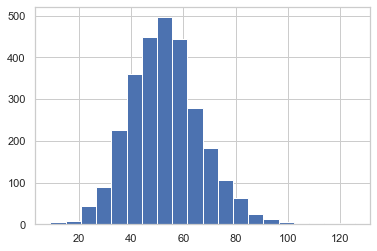

In [183]:
hist = data.loc[data["Mortality_Rate"] != '*', "Mortality_Rate"]
print("min", hist.min(), "max", hist.max())
hist.hist(bins=20);

In [184]:
data = data[data["Mortality_Rate"] != '*']
data

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,120747,23245,122426,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,6396,2708,6627,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068.0,40605,6957,40210,5322,80815,12279,2090,58.1,36,stable,2090,54,31
9,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746.0,13739,2433,13582,2213,27321,4646,2110,35.1,9,stable,2110,34.4,8
10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684.0,22391,6435,21668,5433,44059,11868,2122,64.9,39,stable,2122,50.1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,WY,"Sweetwater County, Wyoming",5058,2177,2881,56037,69022.0,19891,3318,18600,2683,38491,6001,56037,39.9,14,stable,56037,28.4,9
3130,WY,"Teton County, Wyoming",1638,1026,612,56039,75325.0,8948,2558,9555,1192,18503,3750,56039,23.7,5,stable,56039,29.1,5
3131,WY,"Uinta County, Wyoming",2845,1453,1392,56041,56569.0,9132,1413,8711,1503,17843,2916,56041,31.7,6,stable,56041,22.1,4
3132,WY,"Washakie County, Wyoming",1137,489,648,56043,47652.0,3349,691,3490,703,6839,1394,56043,50,6,stable,56043,38.2,5


In [185]:
# data[''] = pd.to_numeric(data.Med_Income)

In [186]:
# # Incidence_Rate
# # Let's use this script to see which values fail to convert to numeric:
# values = []
# for _, j in enumerate(data.Incidence_Rate):
#     try:
#         pd.to_numeric(j)
#     except:
#         values.append(j)
        
# pd.Series(values).value_counts()[:10]

In [187]:
data['less_than_16'] = data["recent_trend"].map(lambda x: 1 if x in ["*", "stable"] else 0)
data['rising'] = data["recent_trend"].map(lambda x: 1 if x == "rising" else 0)
data['falling'] = data["recent_trend"].map(lambda x: 1 if x == "falling" else 0)
data.drop(["recent_trend"], inplace=True, axis=1)
data.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,...,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,fips_y,Mortality_Rate,Avg_Ann_Deaths,less_than_16,rising,falling
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,120747,23245,122426,...,44638,2020,61.5,131,2020,47.3,96,1,0,0
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,6396,2708,6627,...,4482,2050,62.7,6,2050,58.3,5,1,0,0
7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068.0,40605,6957,40210,...,12279,2090,58.1,36,2090,54,31,1,0,0
9,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746.0,13739,2433,13582,...,4646,2110,35.1,9,2110,34.4,8,1,0,0
10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684.0,22391,6435,21668,...,11868,2122,64.9,39,2122,50.1,28,1,0,0


In [193]:
import numpy as np

def encode_incidence_rate(x):
    if x in ["_", "__", "*"]:
        return np.nan
    if type(x) == str and x.endswith("#"):
        x = x.split()[0]
    return float(x)

# data = data.replace({"Incidence_Rate": {"": np.nan}})
# data = data.replace({"Incidence_Rate": {"": np.nan}})
data["Incidence_Rate"] = data["Incidence_Rate"].map(encode_incidence_rate)
sum(data["Incidence_Rate"].isnull())

17

In [194]:
data = data.replace({"Avg_Ann_Incidence": {"_": np.nan}})
sum(data["Avg_Ann_Incidence"].isnull())

0

In [195]:
data.shape, data.dropna().shape

((2658, 22), (2641, 22))

In [196]:
data.dropna(inplace=True)
data.shape

(2641, 22)

In [197]:
for name in ["Avg_Ann_Incidence", "Med_Income"]:
    data[name] = pd.to_numeric(data[name])

In [198]:
y = data["Mortality_Rate"].values

x_columns = ["All_Poverty", "M_Poverty", "F_Poverty", "Med_Income", "M_With", "M_Without", "F_With", "F_Without", "All_With", "All_Without", "Incidence_Rate", "Avg_Ann_Incidence", "less_than_16", "falling", "rising"]
X = data.loc[:, x_columns]

y, X.values

(array([47.3, 58.3, 54, ..., 22.1, 38.2, 43.5], dtype=object),
 array([[2.3914e+04, 1.0698e+04, 1.3216e+04, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.3640e+03, 2.1990e+03, 2.1650e+03, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [7.7520e+03, 3.5230e+03, 4.2290e+03, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.8450e+03, 1.4530e+03, 1.3920e+03, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1370e+03, 4.8900e+02, 6.4800e+02, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [9.5800e+02, 3.5400e+02, 6.0400e+02, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00]]))

In [199]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 2 to 3133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        2641 non-null   int64  
 1   M_Poverty          2641 non-null   int64  
 2   F_Poverty          2641 non-null   int64  
 3   Med_Income         2641 non-null   float64
 4   M_With             2641 non-null   int64  
 5   M_Without          2641 non-null   int64  
 6   F_With             2641 non-null   int64  
 7   F_Without          2641 non-null   int64  
 8   All_With           2641 non-null   int64  
 9   All_Without        2641 non-null   int64  
 10  Incidence_Rate     2641 non-null   float64
 11  Avg_Ann_Incidence  2641 non-null   int64  
 12  less_than_16       2641 non-null   int64  
 13  falling            2641 non-null   int64  
 14  rising             2641 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 330.1 KB


/Users/vasudevgupta/miniconda3/envs/gsoc/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


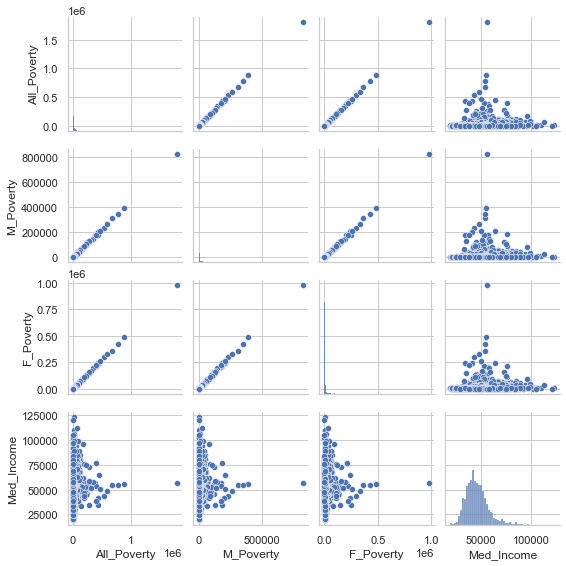

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["All_Poverty", "M_Poverty", "F_Poverty", "Med_Income"]

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X.loc[:, columns], size=2)
plt.show()

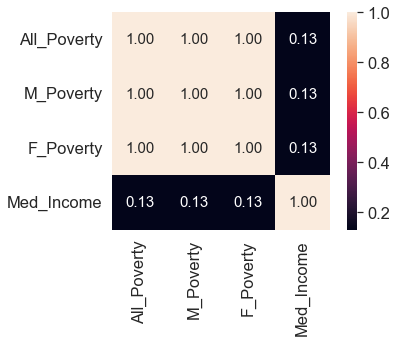

In [201]:
import numpy as np

info = np.corrcoef(X[columns].values.T)
sns.set(font_scale=1.5)
sns.heatmap(info, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=columns, xticklabels=columns)
plt.show()

In [202]:
X.drop(["M_Poverty", "F_Poverty"], axis=1, inplace=True)
X.head()

,All_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,less_than_16,falling,rising
2,23914,78326.0,120747,23245,122426,21393,243173,44638,61.5,131,1,0,0
3,4364,51012.0,6396,2708,6627,1774,13023,4482,62.7,6,1,0,0
7,7752,71068.0,40605,6957,40210,5322,80815,12279,58.1,36,1,0,0
9,2110,85746.0,13739,2433,13582,2213,27321,4646,35.1,9,1,0,0
10,5558,63684.0,22391,6435,21668,5433,44059,11868,64.9,39,1,0,0


/Users/vasudevgupta/miniconda3/envs/gsoc/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


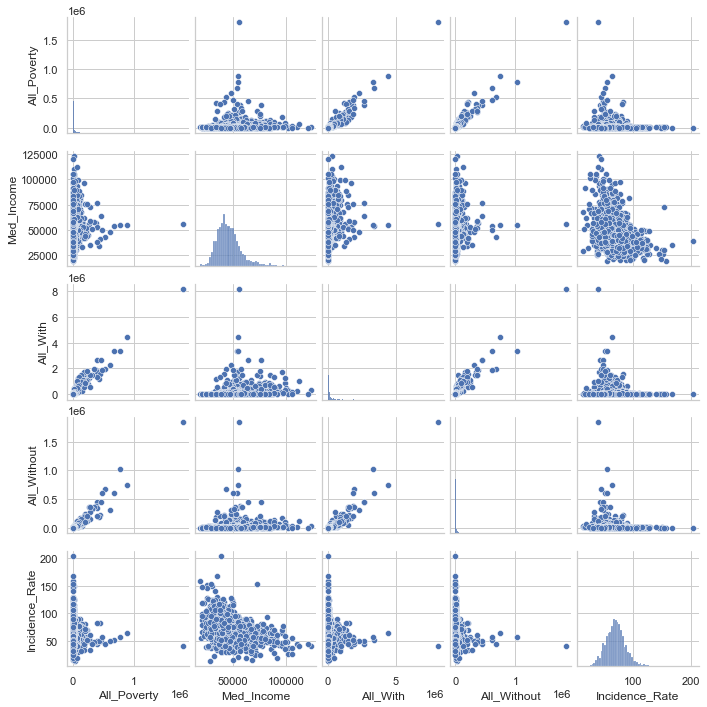

In [203]:
columns = ["All_Poverty", "Med_Income", "All_With", "All_Without", "Incidence_Rate"]

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X[columns], size=2)
plt.show()

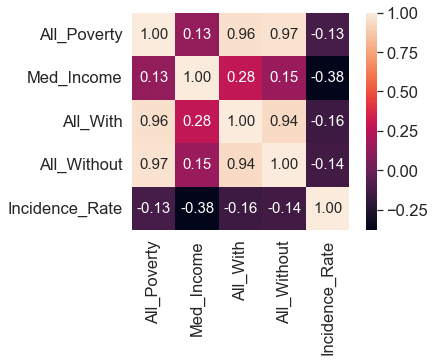

In [204]:
cm = np.corrcoef(X[columns].values.T)

sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=columns, xticklabels=columns)
plt.show()

In [205]:
# Linear Regression

In [ ]:
cols = ['All_Poverty_PC', 'Med_Income', 'All_With_PC',  'All_Without_PC',
        'Incidence_Rate', 'POPESTIMATE2015', 'Falling', 'Rising', 'All_Poverty',
        'All_With', 'All_Without']

In [ ]:
# add constant (coloumn vector of all 1s)
X = X[cols]
X['Constant'] = 1
X.reset_index(drop=True, inplace=True)

In [206]:
X

,All_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,less_than_16,falling,rising
2,23914,78326.0,120747,23245,122426,21393,243173,44638,61.5,131,1,0,0
3,4364,51012.0,6396,2708,6627,1774,13023,4482,62.7,6,1,0,0
7,7752,71068.0,40605,6957,40210,5322,80815,12279,58.1,36,1,0,0
9,2110,85746.0,13739,2433,13582,2213,27321,4646,35.1,9,1,0,0
10,5558,63684.0,22391,6435,21668,5433,44059,11868,64.9,39,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,5058,69022.0,19891,3318,18600,2683,38491,6001,39.9,14,1,0,0
3130,1638,75325.0,8948,2558,9555,1192,18503,3750,23.7,5,1,0,0
3131,2845,56569.0,9132,1413,8711,1503,17843,2916,31.7,6,1,0,0
3132,1137,47652.0,3349,691,3490,703,6839,1394,50.0,6,1,0,0


In [214]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.values, y)

LinearRegression()

In [217]:
model.coef_

array([-2.87161852e-05, -1.51043446e-04, -9.33153417e-06,  1.53826745e-04,
        1.10868217e-05, -1.46177854e-04,  1.75529061e-06,  7.64888929e-06,
        6.51930959e-01, -6.29479134e-03,  2.51424284e-01,  1.20887316e+00,
       -1.46029745e+00])

In [218]:
model.score(X, y)

0.7700797493474676